In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df=pd.read_csv('/content/zombies_data - Sheet1.csv')
df.columns

Index(['SprintSpeed', 'AmmoClips', 'Result'], dtype='object')

In [23]:
x = df[['SprintSpeed', 'AmmoClips']].values
y = df['Result'].values.reshape(-1, 1)

In [24]:
# Normalization
X_mean = x.mean(axis=0)
X_std = x.std(axis=0)
X_norm = (x - X_mean) / X_std
# Add bias term
n = X_norm.shape[0]
Xb = np.hstack((np.ones((n, 1)), X_norm))

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(Xb, y, w):
    z = Xb.dot(w)
    h = sigmoid(z)
    eps = 1e-10
    # binary cross-entropy
    return -np.mean(y * np.log(h + eps) + (1 - y) * np.log(1 - h + eps))

# Gradient Descent
d = Xb.shape[1]   # number of parameters
w = np.zeros((d, 1))   # initialize weights

lr = 0.1        # learning rate
epochs = 2000

loss_history = []
for epoch in range(epochs):
    z = Xb.dot(w)
    h = sigmoid(z)
    grad = (1.0/n) * Xb.T.dot(h - y)
    w -= lr * grad         # gradient descent step

    if epoch % 100 == 0:
        loss = compute_loss(Xb, y, w)
        loss_history.append(loss)

# compute final loss and print weights
final_loss = compute_loss(Xb, y, w)
print("Final loss:", final_loss)
print("Weights (bias, w_speed, w_ammo):")
print(w.ravel())




Final loss: 0.03493943019256901
Weights (bias, w_speed, w_ammo):
[1.28369474 5.96055882 4.34206947]


In [26]:
test_speed = 25.0
test_ammo  = 1.0


test_norm = np.array([(test_speed - X_mean[0]) / X_std[0],
                      (test_ammo  - X_mean[1]) / X_std[1]])
test_b = np.hstack([1.0, test_norm]).reshape(1,3)   # shape (1,3)
prob = sigmoid(test_b.dot(w))[0,0]


print(f"Survival probability = {prob:.4f}")
print("Prediction:", "SURVIVE (1)" if prob >= 0.5 else "INFECTED (0)")

Survival probability = 0.9995
Prediction: SURVIVE (1)


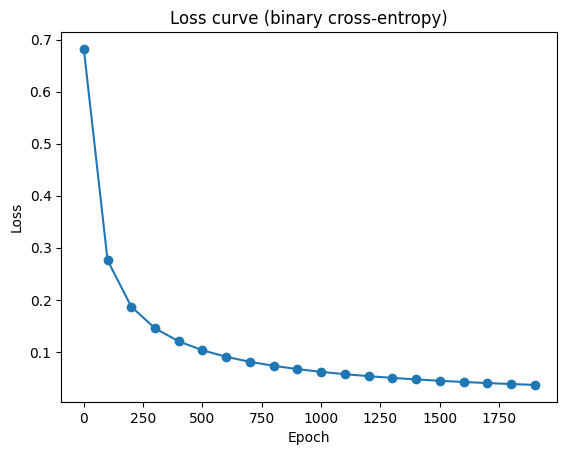

In [27]:
plt.figure()
plt.plot(np.arange(0, epochs, 100), loss_history, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve (binary cross-entropy)")
plt.show()

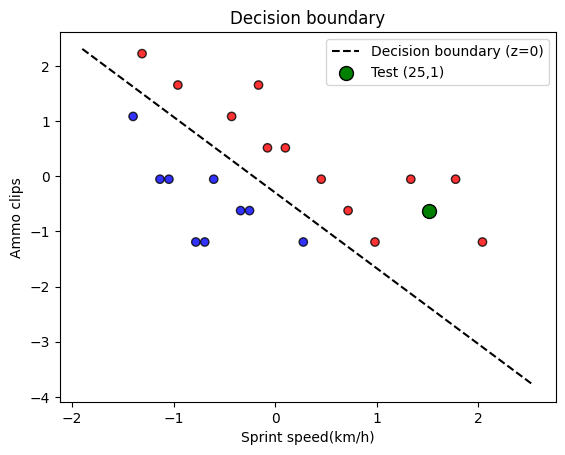

In [28]:
w0, w1, w2 = w.flatten()


x1_min, x1_max = X_norm[:,0].min()-0.5, X_norm[:,0].max()+0.5
xs = np.linspace(x1_min, x1_max, 200)
# Solve for x2 on decision boundary: x2 = -(w0 + w1*x1)/w2

if abs(w2) < 1e-8:
    ys = np.zeros_like(xs)
else:
    ys = -(w0 + w1 * xs) / w2

plt.figure()

plt.scatter(X_norm[:,0], X_norm[:,1], c=y.ravel(), cmap='bwr', edgecolor='k', alpha=0.8)
plt.plot(xs, ys, 'k--', label='Decision boundary (z=0)')
# mark test point (in normalized coordinates)
plt.scatter(test_norm[0], test_norm[1], color='green', edgecolor='k', s=100, label='Test (25,1)')
plt.xlabel("Sprint speed(km/h)")
plt.ylabel("Ammo clips")
plt.legend()
plt.title("Decision boundary")
plt.show()